# Entrenamiento estocástico y por bloques

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [26]:
session = tf.Session()

In [27]:
batch_size = 25

In [28]:
x_vals = np.random.normal(1.0,0.1,200)
y_vals = np.repeat(10.0,200)

In [29]:
x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [30]:
pred = tf.matmul(x_data,A)

In [31]:
loss = tf.reduce_mean(tf.square(pred - y_target))

In [32]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.025)
train_step = optimizer.minimize(loss)

In [33]:
init = tf.global_variables_initializer()

In [34]:
session.run(init)

In [18]:
loss_batch = []
for i in range(200):
    rand_idx = np.random.choice(200, size=batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data:rand_x,y_target:rand_y})
    if (i+1)%5 == 0:
        print("Paso #"+str(i+1)+' A='+str(session.run(A)))
        temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
        print("Loss: "+str(temp_loss))
        loss_batch.append(temp_loss)

Paso #5 A=[[1.6830393]]
Loss: 69.1968
Paso #10 A=[[3.5508025]]
Loss: 42.66879
Paso #15 A=[[5.0030537]]
Loss: 24.33593
Paso #20 A=[[6.1255865]]
Loss: 17.079243
Paso #25 A=[[6.9778595]]
Loss: 10.781096
Paso #30 A=[[7.6575627]]
Loss: 6.5128655
Paso #35 A=[[8.168173]]
Loss: 2.6086216
Paso #40 A=[[8.572624]]
Loss: 3.4330769
Paso #45 A=[[8.862338]]
Loss: 2.017397
Paso #50 A=[[9.08754]]
Loss: 2.4982343
Paso #55 A=[[9.257148]]
Loss: 1.5411117
Paso #60 A=[[9.4011965]]
Loss: 1.439156
Paso #65 A=[[9.495574]]
Loss: 0.8937218
Paso #70 A=[[9.616099]]
Loss: 0.97325516
Paso #75 A=[[9.70776]]
Loss: 1.254233
Paso #80 A=[[9.736427]]
Loss: 1.740951
Paso #85 A=[[9.785953]]
Loss: 0.8628614
Paso #90 A=[[9.7769375]]
Loss: 1.2099218
Paso #95 A=[[9.79001]]
Loss: 0.5925987
Paso #100 A=[[9.831215]]
Loss: 1.2598218
Paso #105 A=[[9.845413]]
Loss: 1.2616812
Paso #110 A=[[9.843135]]
Loss: 1.1326468
Paso #115 A=[[9.87095]]
Loss: 0.6538522
Paso #120 A=[[9.863362]]
Loss: 1.0562757
Paso #125 A=[[9.874506]]
Loss: 0.719921

In [35]:
loss_stochastic = []
for i in range(200):
    rand_index = np.random.choice(200, size=1)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if (i+1)%5 == 0:
        print("Paso #"+str(i+1)+' A='+str(session.run(A)))
        temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
        print("Loss: "+str(temp_loss))
        loss_stochastic.append(temp_loss)

Paso #5 A=[[2.741359]]
Loss: 59.16648
Paso #10 A=[[4.3538294]]
Loss: 33.47199
Paso #15 A=[[5.6208353]]
Loss: 24.64449
Paso #20 A=[[6.6015005]]
Loss: 8.009668
Paso #25 A=[[7.277613]]
Loss: 2.7991567
Paso #30 A=[[7.760189]]
Loss: 0.000110148925
Paso #35 A=[[8.210914]]
Loss: 0.07711858
Paso #40 A=[[8.561798]]
Loss: 1.6485322
Paso #45 A=[[8.924045]]
Loss: 0.005041285
Paso #50 A=[[9.093707]]
Loss: 0.6604647
Paso #55 A=[[9.340846]]
Loss: 3.414972
Paso #60 A=[[9.346824]]
Loss: 0.4263304
Paso #65 A=[[9.4450445]]
Loss: 0.09040053
Paso #70 A=[[9.452388]]
Loss: 0.055084184
Paso #75 A=[[9.43543]]
Loss: 0.6293274
Paso #80 A=[[9.526519]]
Loss: 1.9720283
Paso #85 A=[[9.639946]]
Loss: 0.12694587
Paso #90 A=[[9.79389]]
Loss: 0.07225384
Paso #95 A=[[9.866576]]
Loss: 0.6703069
Paso #100 A=[[9.733988]]
Loss: 1.0816932
Paso #105 A=[[9.805816]]
Loss: 1.0694921
Paso #110 A=[[9.767814]]
Loss: 0.6526307
Paso #115 A=[[9.829211]]
Loss: 1.7424622
Paso #120 A=[[9.793433]]
Loss: 0.010026224
Paso #125 A=[[9.7947445]

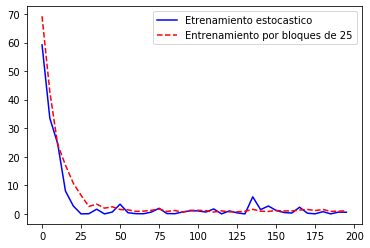

In [37]:
plt.plot(range(0,200,5), loss_stochastic, 'b-', label="Etrenamiento estocastico")
plt.plot(range(0,200,5), loss_batch, 'r--', label="Entrenamiento por bloques de 25")
plt.legend(loc="upper right", prop={'size':10})
plt.show()